## IMPORT

In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np

## READS "tif" FILES

In [2]:
band2 = rasterio.open('blue.tif')           # Blue Band
band3 = rasterio.open('green.tif')          # Green Band
band4 = rasterio.open('red.tif')            # Red Band
band5 = rasterio.open('near_infrared.tif')  # Near Infrared Band

C:\Users\Alp\anaconda3\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


## Converts tif files to arrays

In [3]:
blue = band2.read(1).astype('float64')
green = band3.read(1).astype('float64')
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

### This funtion normalize the interval of the elements of the array between 0 and 1

In [4]:
def normalize(array):
    """
    Normalize the interval of the elements of the array between 0 and 1
    
    
    Parameters
    ----------
    array: type(array) size:999x999 cells include pixel reflectance values
    float id
    
    
    Returns
    -------
    norm_array : type(array) size:999x999 cells include pixel reflectance values
    as normalized values

    """
    array_min, array_max = array.min(), array.max()
    norm_array = (array - array_min)/(array_max - array_min)
    return norm_array


## Showing three bands as false color image

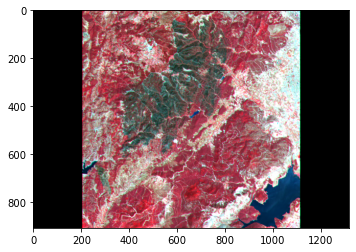

In [5]:
redn = normalize(red)
greenn = normalize(green)
nirn = normalize(nir)
false_color = np.dstack((nirn, redn, greenn))
plt.imshow(false_color)

## Showing three bands as false color image

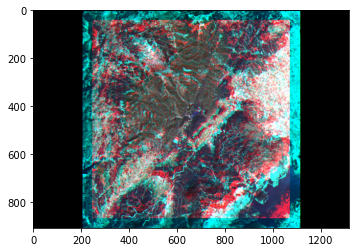

In [6]:
bluen = normalize(blue)
true_color = np.dstack((bluen, redn, greenn))
plt.imshow(true_color)

## Plotting the ndvi of the image

This index defines values from -1.0 to 1.0, basically representing greens, where negative values ​​are mainly formed from clouds, water and snow, and values close to zero are primarily formed from rocks and bare soil. Very small values ​​(0.1 or less) of the NDVI function correspond to empty areas of rocks, sand or snow. Moderate values ​​(from 0.2 to 0.3) represent shrubs and meadows, while large values (from 0.6 to 0.8) indicate temperate and tropical forests.

<ipython-input-7-7d1adaa80eb6>:1: RuntimeWarning: invalid value encountered in true_divide
  ndvi = np.where((nir+red) == 0., 0, (nir - red) / (nir + red))
C:\Users\Alp\anaconda3\lib\site-packages\rasterio\__init__.py:237: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


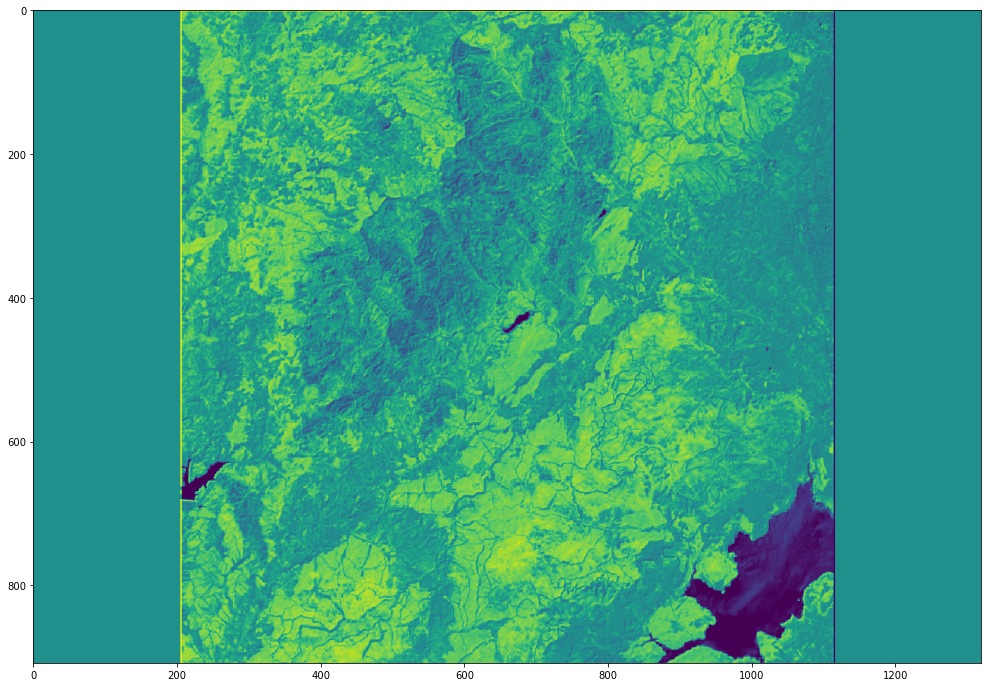

In [7]:
ndvi = np.where((nir+red) == 0., 0, (nir - red) / (nir + red))
ndviImage = rasterio.open('ndviImage1.tiff', 'w', driver='Gtiff',width=band4.width,height=band4.height,count=1, crs=band4.crs,transform=band4.transform,dtype='float64')
ndviImage.write(ndvi, 1)
ndviImage.close()
ndvi = rasterio.open('ndviImage1.tiff')
fig = plt.figure(figsize=(18, 12))
plot.show(ndvi)